In [1]:
import cv2
import pytesseract
from hate_speech_classifier import classify

/home/bartosz/code/Golem-2/venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Mention the installed location of Tesseract-OCR in your system 
# Read image from which text needs to be extracted
img = cv2.imread("hate.jpeg")
 
# Preprocessing the image starts
 
# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
 
# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
 
# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
 
# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_NONE)
 
# Creating a copy of image
im2 = img.copy()
 
# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    print(x, y, w, h) 
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
     
    # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]
          
    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(cropped)
    print(text)
    print(classify(text))

4 73 270 83
 

 

Lets kill jews and kill them for fun
#killiews
7/20/14, 8:05 AM

 

 



2022-01-15 21:20:33.192947: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/bartosz/code/Golem-2/venv/lib/python3.9/site-packages/cv2/../../lib64:
2022-01-15 21:20:33.193026: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


no-hate-speech
298 17 19 19

no-hat-------------
4 2 191 62
 

 

 

& HAMAS PALESTINE
é 4ng_yus

 

 

hate-speech


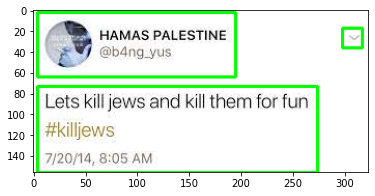

In [8]:
from matplotlib import pyplot as plt
plt.imshow(im2)